In [60]:
import pandas as pd
import numpy as np
import scipy as sp
import math
import sympy as sym

paramsdf = pd.DataFrame({'mass':[], 'sma':[], 'ecc':[], 'aop':[], 'inc':[], 'lan':[], 'mea':[], 'j2r2':[], 'c22r2':[], 'spaop':[], 'spinc':[], 'splan':[]})
paramsdf['mass'] = [2,4,6]
paramsdf['sma'] = [3,4,5]
paramsdf['ecc'] = [0.01,0.1,0.05]


paramsDF = pd.DataFrame(columns = ['mass','sma','ecc','aop','inc','lan','mea','j2r2','c22r2','spaop','spinc','splan'],index=['sun','theKBO','obj1','obj2','obj3'])


In [73]:
priorsdf = pd.DataFrame(columns = ['mass','sma','ecc','aop','inc','lan','mea','j2r2','c22r2','spaop','spinc','splan'],index=['dist. shape','uni-low','uni-up','log-uni-low','log-uni-up','norm-cen','norm-spread','log-norm-cen','log-norm-spread'])

priorsdf['mass'] = [0,1,1,1,1,1,1,1,1]
priorsdf['sma'] = [0,1,1,1,1,1,1,1,1]
priorsdf['ecc'] = [2,1,1,1,1,1,1,1,1]
priorsdf['aop'] = [0,1,1,1,1,1,1,1,1]
priorsdf['inc'] = [0,1,1,1,1,1,1,1,1]
priorsdf['lan'] = [1,1,1,1,300,1,1,1,1]
priorsdf['mea'] = [0,1,1,1,1,1,1,1,1]
priorsdf['j2r2'] = [0,1,1,1,1,1,1,1,1]
priorsdf['c22r2'] = [3,1,1,1,1,1,1,70000,1]
priorsdf['spaop'] = [0,1,1,1,1,1,1,1,1]
priorsdf['spinc'] = [0,1,1,1,1,1,1,1,1]
priorsdf['splan'] = [0,1,1,1,1,1,1,1,1]

In [74]:
def makePriorProb(params):
    columnList = list(params)
    combinedPriorProbs = 0
    x = sym.Symbol('x')
    #This loop runs through every column in the priors dataframe, and evaluates the probability density
    #function of the specified type.
    for i in columnList: 
        
        if params[i][0] == 0:
            #Uniform Distribution Shape
            PriorProb = 1/(params[i][1]+params[i][2])
            
        elif params[i][0] == 1:
            #Log-Uniform Distribution Shape
            PriorProb = 1/(params[i][3]+params[i][4])
            
        elif params[i][0] == 2:
            # Normal Distribution Shape
            PriorProb = 1/(params[i][5]*sym.sqrt(math.pi))*sym.exp(-1/2*((x-params[i][6])/params[i][5])**2)
            
        elif params[i][0] == 3:
            #Log Normal Distribution Shape
            PriorProb = 1/(params[i][7]*sym.sqrt(math.pi))*sym.exp(-1/2*((x-params[i][8])/params[i][7])**2)
        else:
            print('Invalid input.') 
            
        #Here, add the Prior Probability Density function for this element to the total
        combinedPriorProbs = combinedPriorProbs + sym.log(PriorProb,10)
    return combinedPriorProbs

log(8.05985119353938e-6*exp(-0.5*(x/70000 - 1/70000)**2))/log(10) + log(0.564189583547756*exp(-0.5*(x - 1)**2))/log(10) - 11.9454348897884/log(10)


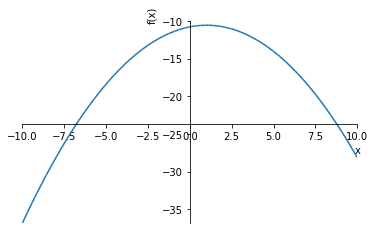

In [75]:
dist = makePriorProb(priorsdf)
print(dist)

from sympy.plotting import plot

plot(dist,yscale='linear', show=True)